# TABLE OF CONTENTS:

### - PART 1: CHECK IMBALANCE
### - PART 2: CHECK OUTLINER
### - PART 3: CHECK MISSING VALUES
### - PART 4: CHECK CATEGORICAL COLUMNS 
### - PART 5: EDA
### - PART 6: Observation and Conclusion

In [1]:
from utils import *
from input import path_to_data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#for 100% jupyter notebook cell width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#pandas DataFrame column and row display limits
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

%matplotlib inline

**dseb63_application_{train|test}csv**

In [3]:
application_train = pd.read_csv(os.path.join(path_to_data, 'dseb63_application_train.csv'), index_col=0)

In [4]:
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,...,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,8.0,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,NaN,0.714279,0.540654,

In [5]:
print('-'*90)
print(f'The shape of application_train.csv is: {application_train.shape}')
print('-'*90)
print(f'Number of duplicate values in application_train: {application_train.shape[0] - application_train.duplicated().shape[0]}')
print('-'*90)

------------------------------------------------------------------------------------------
The shape of application_train.csv is: (246009, 122)
------------------------------------------------------------------------------------------
Number of duplicate values in application_train: 0
------------------------------------------------------------------------------------------


In [6]:
application_test = pd.read_csv(os.path.join(path_to_data, 'dseb63_application_test.csv'), index_col=0)

In [7]:
application_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009630,-13297,-762,-637.0,-4307,19.0,1,1,0,1,0,0,Sales staff,4.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.675878,0.604894,0.000527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,83659
1,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.006852,-14778,-1141,-1610.0,-4546,11.0,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.430827,0.425351,0.712155,0.0753,0.0568,0.9970,0.9592,0.1326,0.08,0.0517,0.4167,...,0.0568,0.9970,0.9597,0.1335,0.08,0.0517,0.4167,0.2917,0.0748,0.0611,0.0859,0.0058,0.1142,reg oper account,block of flats,0.0754,Monolithic,No,2.0,0.0,2.0,0.0,-1071.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,174814
2,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-17907,-639,-2507.0,-1461,4.0,1,1,1,1,0,0,Sales staff,2.0,2,2,TUESDAY,16,0,0,0,0,0,0,Self-employed,0.527239,0.531760,0.207964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,-1435.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,179486
3,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,State servant,Secondary / secondary special,Widow,House / apartment,0.046220,-19626,-6982,-11167.0,-3158,NaN,1,1,0,1,0,0,High skill tech staff,1.0,1,1,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 3,NaN,0.693521,0.614414,0.1320,0.0645,0.9846,NaN,NaN,0.16,0.0690,0.6250,...,0.0645,0.9846,NaN,NaN,0.16,0.0690,0.6250,NaN,NaN,NaN,0.1657,NaN,0.0022,NaN,NaN,0.1285,Panel,No,0.0,0.0,0.0,0.0,-2000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,57038
4,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,234000.0,Unaccompanied,Working,Secondary / seco

In [8]:
print('-'*100)
print(f'The shape of application_test.csv is: {application_test.shape}')
print('-'*100)
print(f'Number of duplicate values in application_test: {application_test.shape[0] - application_test.duplicated().shape[0]}')
print('-'*100)

----------------------------------------------------------------------------------------------------
The shape of application_test.csv is: (61502, 121)
----------------------------------------------------------------------------------------------------
Number of duplicate values in application_test: 0
----------------------------------------------------------------------------------------------------


# *0. LOOKTHROUGH DATA*

**dseb63_installments_payments.csv**

In [9]:
installments_payments = pd.read_csv(os.path.join(path_to_data, 'dseb63_installments_payments.csv'))
installments_payments 

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR
0,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360,147397.0
1,2452854,1.0,21,-546.0,-552.0,11302.605,11302.605,147397.0
2,1054186,1.0,2,-1300.0,-1307.0,6948.360,6948.360,147397.0
3,1682318,1.0,2,-240.0,-243.0,7374.510,7374.510,147397.0
4,2452854,1.0,10,-876.0,-882.0,11302.605,11302.605,147397.0
...,...,...,...,...,...,...,...,...
7744753,2192667,1.0,6,-2352.0,-2352.0,5322.240,5322.240,21216.0
7744754,2208281,1.0,4,-452.0,-466.0,63195.435,63195.435,21216.0
7744755,2657771,0.0,3,-2907.0,-2932.0,3375.000,3375.000,21216.0
7744756,2657771,0.0,47,-1871.0,-1871.0,4915.890,4915.890,21216.0


In [10]:
column_to_move = 'SK_ID_CURR'  

# Get a list of column names excluding the column to move
other_columns = [col for col in installments_payments .columns if col != column_to_move]

# Reorder the columns with the column to move in the second position
installments_payments = installments_payments[other_columns[:1] + [column_to_move] + other_columns[1:]]

installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,147397.0,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,2452854,147397.0,1.0,21,-546.0,-552.0,11302.605,11302.605
2,1054186,147397.0,1.0,2,-1300.0,-1307.0,6948.360,6948.360
3,1682318,147397.0,1.0,2,-240.0,-243.0,7374.510,7374.510
4,2452854,147397.0,1.0,10,-876.0,-882.0,11302.605,11302.605


In [11]:
installments_payments.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744758 entries, 0 to 7744757
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              float64
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(6), int64(2)
memory usage: 472.7 MB


In [12]:
installments_payments.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,7744758.0,1.902824e+06,536057.048422,1000001.0,1432108.0,1895642.000,2368895.00,2843495.000
SK_ID_CURR,7744757.0,1.535739e+05,88642.670096,0.0,76848.0,153076.000,230144.00,307508.000
NUM_INSTALMENT_VERSION,7744758.0,8.254635e-01,0.977500,0.0,0.0,1.000,1.00,178.000
NUM_INSTALMENT_NUMBER,7744758.0,1.991675e+01,27.631877,1.0,4.0,9.000,21.00,275.000
DAYS_INSTALMENT,7744758.0,-1.055681e+03,800.971290,-2922.0,-1677.0,-842.000,-369.00,-2.000
DAYS_ENTRY_PAYMENT,7743119.0,-1.064303e+03,800.623200,-3160.0,-1686.0,-851.000,-379.00,-2.000
AMT_INSTALMENT,7744757.0,1.672476e+04,49977.456799,0.0,4050.0,8611.920,16413.12,3771487.845
AMT_PAYMENT,7743119.0,1.685389e+04,54076.023766,0.0,3375.0,7906.185,15750.00,3771487.845


In [41]:
print(f'The shape of dseb63_installments_payments.csv is: {installments_payments.shape}')
print('-'*90)
print(f'Number of unique SK_ID_PREV in dseb63_installments_payments.csv are: {len(installments_payments.SK_ID_PREV.unique())}')
print(f'Number of unique SK_ID_CURR in dseb63_installments_payments.csv are: {len(installments_payments.SK_ID_CURR.unique())}')
print('-'*90)
print(f'Number of overlapping SK_ID_CURR in dseb63_application_train.csv and dseb63_installments_payments.csv are: {len(set(application_train.SK_ID_CURR.unique()).intersection(set(installments_payments.SK_ID_CURR.unique())))}')
print(f'Number of overlapping SK_ID_CURR in dseb63_application_test.csv and dseb63_installments_payments.csv are: {len(set(application_test.SK_ID_CURR.unique()).intersection(set(installments_payments.SK_ID_CURR.unique())))}')
print('-'*90)

print(f'Number of duplicate values in installments_payments: {installments_payments.shape[0] - installments_payments.duplicated().shape[0]}')

The shape of dseb63_installments_payments.csv is: (7744758, 8)
------------------------------------------------------------------------------------------
Number of unique SK_ID_PREV in dseb63_installments_payments.csv are: 549020
Number of unique SK_ID_CURR in dseb63_installments_payments.csv are: 180734
------------------------------------------------------------------------------------------
Number of overlapping SK_ID_CURR in dseb63_application_train.csv and dseb63_installments_payments.csv are: 144408
Number of overlapping SK_ID_CURR in dseb63_application_test.csv and dseb63_installments_payments.csv are: 36325
------------------------------------------------------------------------------------------
Number of duplicate values in installments_payments: 0


# *1.IMBALANCE*

In [13]:
imbalance_col(installments_payments)

Imbalance Ratio for column 'NUM_INSTALMENT_VERSION': 1.9154
Imbalance Ratio for column 'NUM_INSTALMENT_NUMBER': None
Imbalance Ratio for column 'DAYS_INSTALMENT': None
Imbalance Ratio for column 'DAYS_ENTRY_PAYMENT': None
Imbalance Ratio for column 'AMT_INSTALMENT': None
Imbalance Ratio for column 'AMT_PAYMENT': None
------------------------------------------------------------------------------------------
The column with the heaviest imbalance ratio is 'NUM_INSTALMENT_VERSION' with ratio 1.9154


##### Observations and Conclusions

It seems that most columns don't exhibit significant class imbalance as their imbalance ratios are marked as 'None'. However, the column 'NUM_INSTALMENT_VERSION' has a relatively high imbalance ratio of 1.9154, indicating a notable disparity in the distribution of its values. It might be worthwhile to investigate further into this column to understand the underlying reasons for such imbalance and its potential impact on the overall analysis.

# *2.Outlier*

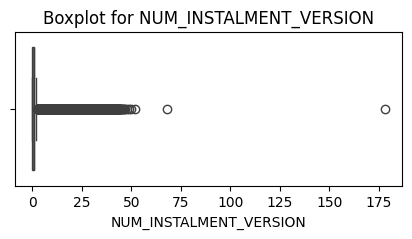

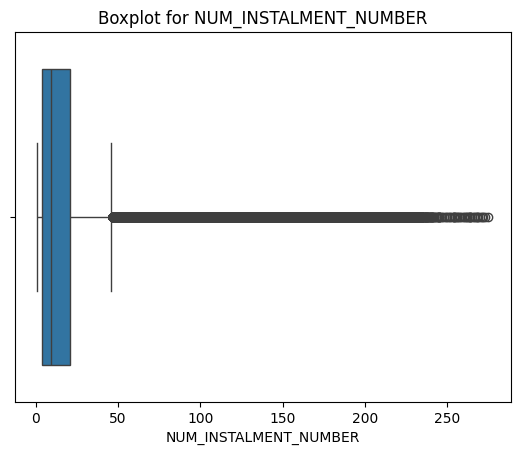

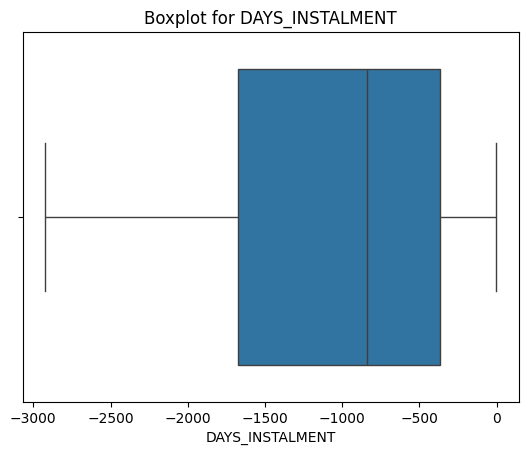

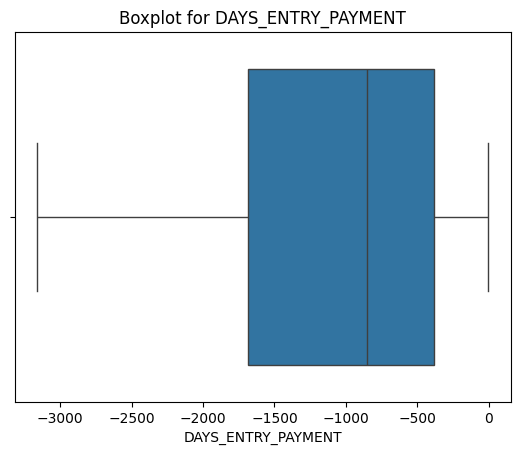

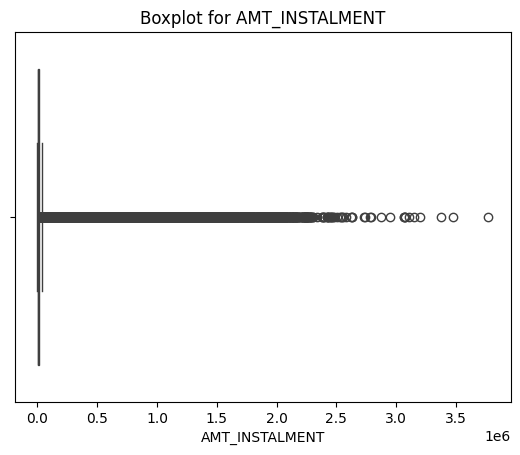

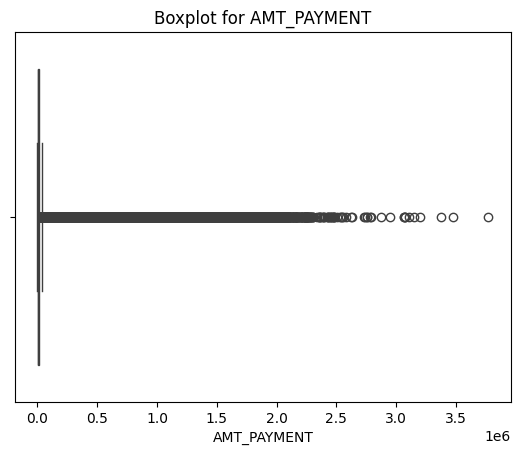

Rows with outliers:
         NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  \
16                          2.0                      2           -272.0   
94                          2.0                     11          -1431.0   
102                         0.0                     47          -1761.0   
104                         0.0                     76           -877.0   
108                         0.0                     72           -999.0   
...                         ...                    ...              ...   
7744750                     1.0                      7           -644.0   
7744752                     0.0                     76           -989.0   
7744754                     1.0                      4           -452.0   
7744756                     0.0                     47          -1871.0   
7744757                     0.0                     94             -4.0   

         DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
16                  

In [14]:
outlier(installments_payments)

##### Observations and Conclusions

The table displays rows with potential outliers, particularly in columns like 'NUM_INSTALMENT_VERSION,' 'NUM_INSTALMENT_NUMBER,' 'DAYS_INSTALMENT,' 'DAYS_ENTRY_PAYMENT,' 'AMT_INSTALMENT,' and 'AMT_PAYMENT.' Outliers in these rows might have an impact on the overall analysis or modeling process. \
    → It's essential to carefully evaluate and decide whether to handle these outliers by removing or transforming them, depending on the specific goals of your analysis and the nature of the data. \
    Additionally, missing values in 'DAYS_ENTRY_PAYMENT,' 'AMT_INSTALMENT,' and 'AMT_PAYMENT' columns should be considered during data preprocessing

# *3. NaN Percentage*

In [15]:
nan_ip = nan_percent(installments_payments)
nan_ip

,Column,Percentage_of_NaN
7,AMT_PAYMENT,0.021163
5,DAYS_ENTRY_PAYMENT,0.021163
1,SK_ID_CURR,0.000013
6,AMT_INSTALMENT,0.000013
3,NUM_INSTALMENT_NUMBER,0.000000
2,NUM_INSTALMENT_VERSION,0.000000
0,SK_ID_PREV,0.000000
4,DAYS_INSTALMENT,0.000000


Number of columns having NaN values: 4 columns


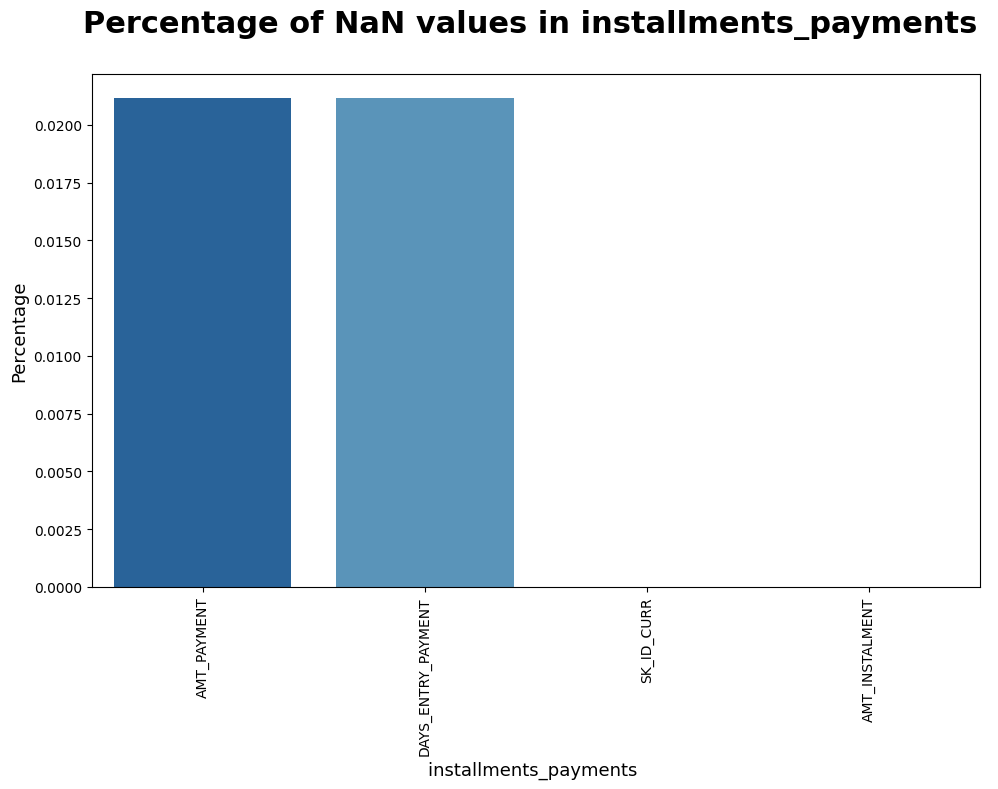

In [16]:
plot_nan_percent(nan_ip, 'installments_payments ', tight_layout = False, figsize = (10,8))

##### Observations and Conclusions

It appears that the dataset has relatively low missing values, with most columns having either no missing values or a very small percentage. 'DAYS_ENTRY_PAYMENT' and 'AMT_PAYMENT' columns have a slightly higher percentage of missing values at 0.021163%. \
On the other hand, columns such as 'AMT_INSTALMENT,' 'SK_ID_CURR,' 'SK_ID_PREV,' 'NUM_INSTALMENT_VERSION,' 'NUM_INSTALMENT_NUMBER,' and 'DAYS_INSTALMENT' show no missing values. Handling the missing values in 'DAYS_ENTRY_PAYMENT' and 'AMT_PAYMENT' may be necessary depending on the analysis being conducted, considering the relatively small proportion of missing data

# *4.  CATEGORICAL COLUMN*

In [17]:
cate_ip = get_category_column(installments_payments)
cate_ip

,Feature,Nunique,Percentage of NaN


# *5.EDA*

### 5.1.CORRELATION

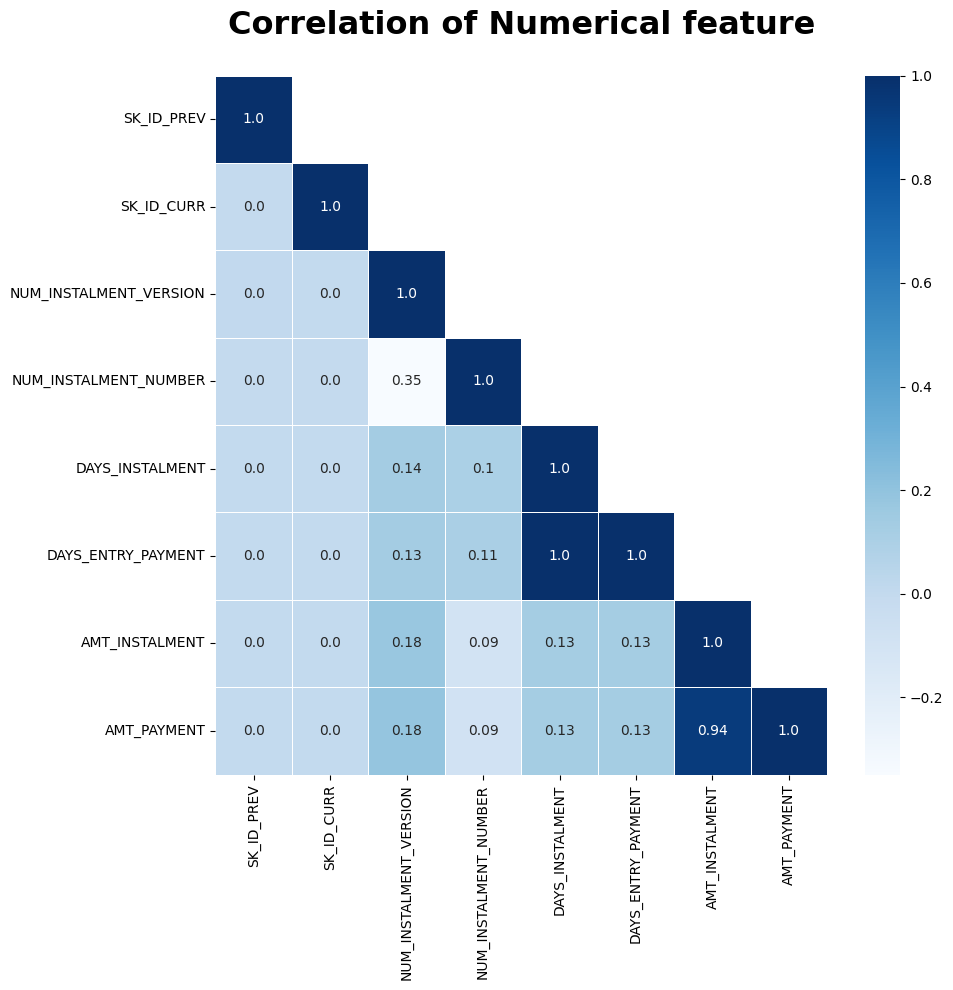

In [18]:
numeric_cor(installments_payments)

In [19]:
ip_df = installments_payments.drop(["SK_ID_PREV"], axis = 1)
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744758 entries, 0 to 7744757
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              float64
 1   NUM_INSTALMENT_VERSION  float64
 2   NUM_INSTALMENT_NUMBER   int64  
 3   DAYS_INSTALMENT         float64
 4   DAYS_ENTRY_PAYMENT      float64
 5   AMT_INSTALMENT          float64
 6   AMT_PAYMENT             float64
dtypes: float64(6), int64(1)
memory usage: 413.6 MB


### 5.2. MERGE WITH APPLICATION_TRAIN

In [20]:
ip_merged = pd.merge(application_train[['SK_ID_CURR','TARGET']], installments_payments, how = 'left', on=['SK_ID_CURR'])
ip_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,278621,0,1810518.0,1.0,2.0,-686.0,-690.0,98356.995,98356.995
1,278621,0,1810518.0,1.0,3.0,-656.0,-661.0,98356.995,98356.995
2,278621,0,2396755.0,1.0,4.0,-2220.0,-2226.0,6737.310,6737.310
3,278621,0,2396755.0,1.0,9.0,-2070.0,-2071.0,6737.310,6737.310
4,278621,0,2396755.0,1.0,5.0,-2190.0,-2199.0,6737.310,6737.310
...,...,...,...,...,...,...,...,...,...
6292342,90253,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6292343,9027,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6292344,163598,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6292345,300375,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
def boxplot(ip_merged, col_name):
    plt.figure(figsize=(10,2))
    sns.boxplot(x = ip_merged[col_name], orient = "h")

    plt.tight_layout()
    plt.show()

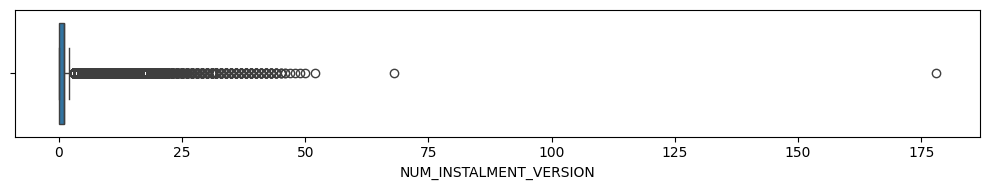

In [22]:
boxplot(ip_merged, "NUM_INSTALMENT_VERSION")

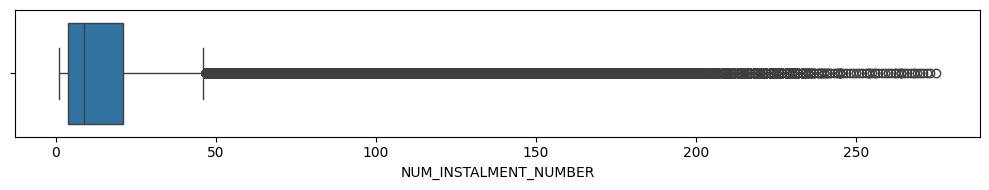

In [23]:
boxplot(ip_merged, "NUM_INSTALMENT_NUMBER")

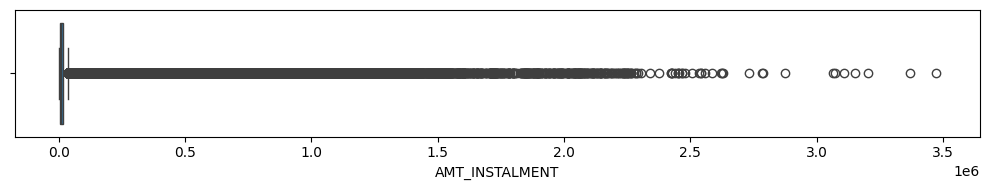

In [24]:
boxplot(ip_merged, "AMT_INSTALMENT")

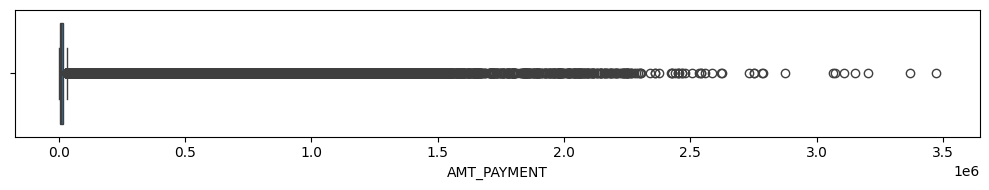

In [25]:
boxplot(ip_merged, "AMT_PAYMENT")

### 5.3. CATEGORICAL VARIABLES

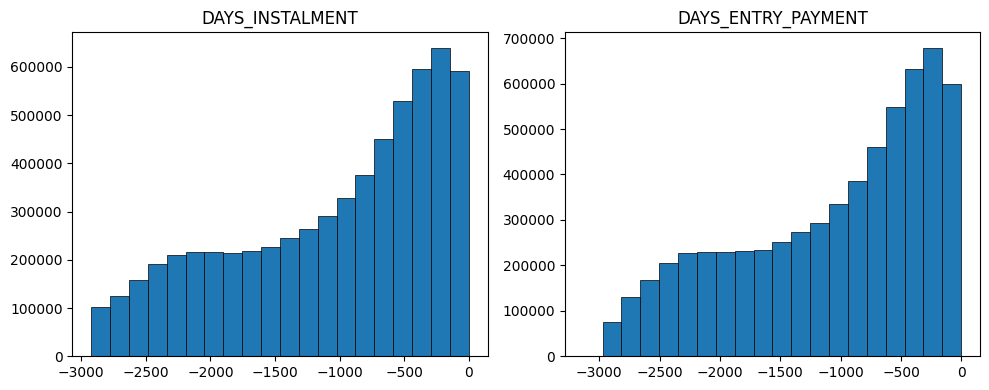

In [26]:
ip_merged.iloc[:,5:7].hist(bins=20, grid=False, figsize=(10,4), edgecolor='black', linewidth=0.5)
plt.tight_layout()
plt.show()

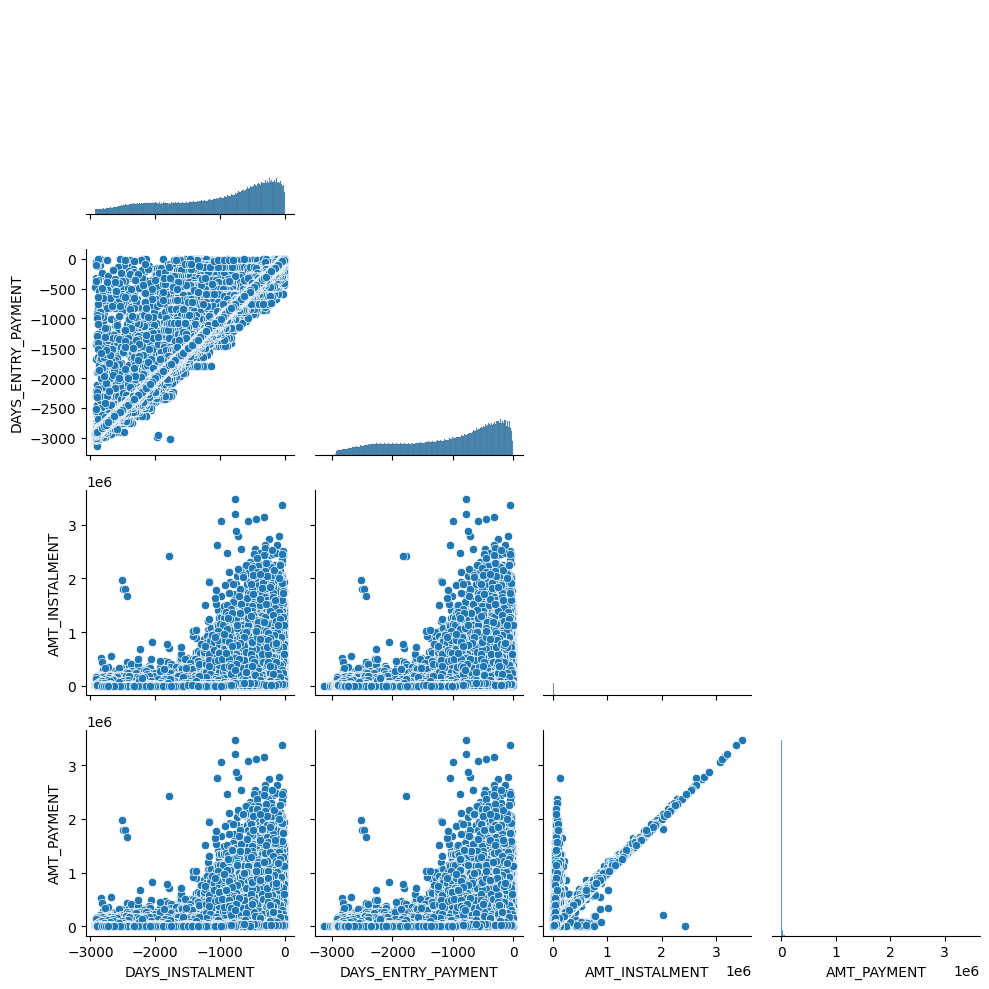

In [27]:
sns.pairplot(ip_merged.iloc[:,5:9], corner=True)
plt.tight_layout()
plt.show()

In [28]:
ip_merged[["SK_ID_CURR","DAYS_INSTALMENT","DAYS_ENTRY_PAYMENT"]]

,SK_ID_CURR,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT
0,278621,-686.0,-690.0
1,278621,-656.0,-661.0
2,278621,-2220.0,-2226.0
3,278621,-2070.0,-2071.0
4,278621,-2190.0,-2199.0
...,...,...,...
6292342,90253,NaN,NaN
6292343,9027,NaN,NaN
6292344,163598,NaN,NaN
6292345,300375,NaN,NaN


In [29]:
def convert_month(day_to_month):
    day_to_month_1 = day_to_month/30 
    return day_to_month_1
ip_merged['DAYS_INSTALMENT'] =  ip_merged['DAYS_INSTALMENT'].apply(convert_month)
ip_merged['DAYS_ENTRY_PAYMENT'] = ip_merged['DAYS_ENTRY_PAYMENT'].apply(convert_month)

In [30]:
ip_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,278621,0,1810518.0,1.0,2.0,-22.866667,-23.000000,98356.995,98356.995
1,278621,0,1810518.0,1.0,3.0,-21.866667,-22.033333,98356.995,98356.995
2,278621,0,2396755.0,1.0,4.0,-74.000000,-74.200000,6737.310,6737.310
3,278621,0,2396755.0,1.0,9.0,-69.000000,-69.033333,6737.310,6737.310
4,278621,0,2396755.0,1.0,5.0,-73.000000,-73.300000,6737.310,6737.310
...,...,...,...,...,...,...,...,...,...
6292342,90253,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6292343,9027,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6292344,163598,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6292345,300375,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


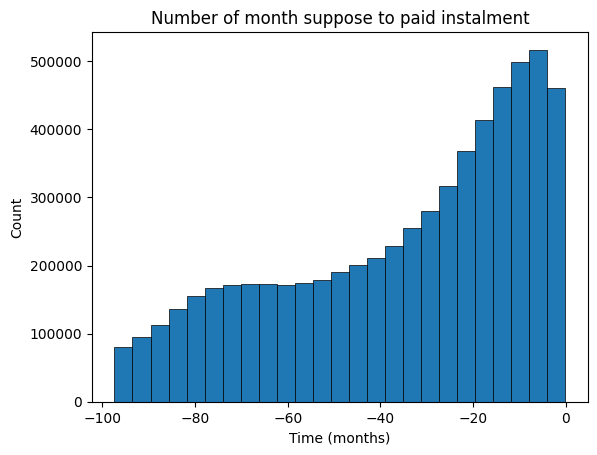

In [31]:
plt.hist(ip_merged['DAYS_INSTALMENT'], bins = 25, edgecolor = 'black', linewidth = 0.5)
plt.title('Number of month suppose to paid instalment')
plt.xlabel('Time (months)')
plt.ylabel('Count')
plt.show()

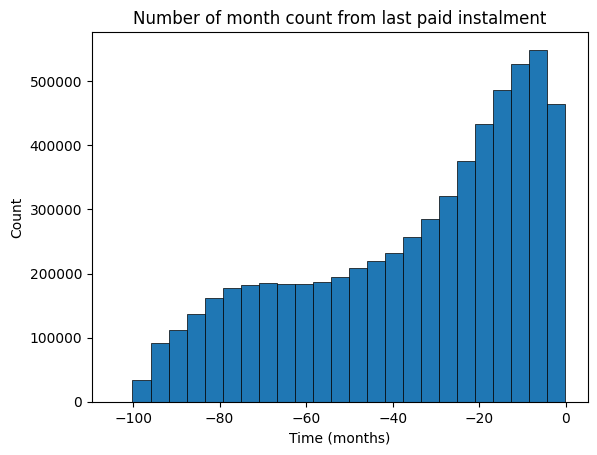

In [32]:
plt.hist(ip_merged['DAYS_ENTRY_PAYMENT'], bins = 25, edgecolor = 'black', linewidth = 0.5)
plt.title('Number of month count from last paid instalment')
plt.xlabel('Time (months)')
plt.ylabel('Count')
plt.show()

In [33]:
#add flag to indicate installment received on time and the minimum payment was received
def on_time(x):
    timely = x['DAYS_INSTALMENT'] >= x['DAYS_ENTRY_PAYMENT']
    min_met = x['AMT_PAYMENT'] >= x['AMT_INSTALMENT']
    if timely and min_met:
        return 1
    else:
        return 0

ip_merged['TIMELY_FLAG'] = ip_merged.apply(on_time,axis=1)

In [34]:
ip_merged['TIMELY_SUM'] = ip_merged.groupby(['SK_ID_CURR'])['TIMELY_FLAG'].transform('sum')

In [35]:
ip_merged['INSTALLMENT_COUNT'] =ip_merged.groupby(['SK_ID_CURR'])['TIMELY_FLAG'].transform('count')

In [36]:
features = ['TIMELY_SUM','INSTALLMENT_COUNT']
ip_merged_final = ip_merged.groupby(['SK_ID_CURR'])[features].first().reset_index()

In [37]:
ip_merged_final['TIMELY_PERCENT'] = ip_merged_final['TIMELY_SUM'] / ip_merged_final['INSTALLMENT_COUNT']
ip_merged_final['TIMELY_PERCENT'].describe()

count    246009.000000
mean          0.517545
std           0.454783
min           0.000000
25%           0.000000
50%           0.714286
75%           1.000000
max           1.000000
Name: TIMELY_PERCENT, dtype: float64

In [38]:
def payment_cat(x):
    '''Put each id into a category based timely payments rate.'''
    if x >= 0.89:
        return 'Good'
    elif x >= 0.83:
        return 'Par'
    elif x >= 0.71:
        return 'Sub_Par'
    elif x >= 0.53:
        return 'Poor'
    else:
        return 'Very_Poor'

ip_merged_final['INSTLL_PAY_PAYMENT_GRADE'] = ip_merged_final['TIMELY_PERCENT'].apply(payment_cat)

In [39]:
ip_merged_final.groupby(['INSTLL_PAY_PAYMENT_GRADE'])['TIMELY_PERCENT'].describe()

,count,mean,std,min,25%,50%,75%,max
INSTLL_PAY_PAYMENT_GRADE,,,,,,,,
Good,95559.0,0.980886,0.031487,0.89000,0.966102,1.000000,1.000000,1.000000
Par,12733.0,0.861007,0.017964,0.83000,0.846154,0.861538,0.875676,0.889908
Poor,11837.0,0.630506,0.051282,0.53012,0.588235,0.636364,0.674419,0.709924
Sub_Par,15328.0,0.773676,0.035355,0.71000,0.744681,0.777778,0.803922,0.829932
Very_Poor,110552.0,0.029876,0.107049,0.00000,0.000000,0.000000,0.000000,0.529915


In [40]:
ip_merged_final

,SK_ID_CURR,TIMELY_SUM,INSTALLMENT_COUNT,TIMELY_PERCENT,INSTLL_PAY_PAYMENT_GRADE
0,0,30,30,1.000000,Good
1,1,23,40,0.575000,Poor
2,2,0,1,0.000000,Very_Poor
3,3,43,43,1.000000,Good
4,4,6,6,1.000000,Good
...,...,...,...,...,...
246004,307505,0,1,0.000000,Very_Poor
246005,307506,38,42,0.904762,Good
246006,307507,0,1,0.000000,Very_Poor
246007,307509,0,1,0.000000,Very_Poor


# *6.Observation and Conclusion*

##### Observations and Conclusions

1. Imbalance Ratios:
- Most columns do not exhibit significant class imbalance.
- 'NUM_INSTALMENT_VERSION' has the highest imbalance ratio at 1.9154.

2. Percentage of Missing Values:
- 'DAYS_ENTRY_PAYMENT' and 'AMT_PAYMENT' have a slightly higher percentage of missing values at 0.021163%.
- Other columns, including 'AMT_INSTALMENT,' 'SK_ID_CURR,' 'SK_ID_PREV,' 'NUM_INSTALMENT_VERSION,' 'NUM_INSTALMENT_NUMBER,' and 'DAYS_INSTALMENT,' show no missing values or a very small percentage.

3. Rows with Outliers:
- Identified rows with potential outliers in various columns, such as 'NUM_INSTALMENT_VERSION,' 'NUM_INSTALMENT_NUMBER,' 'DAYS_INSTALMENT,' 'DAYS_ENTRY_PAYMENT,' 'AMT_INSTALMENT,' and 'AMT_PAYMENT.'
- Outliers may impact analysis and modeling and should be carefully evaluated.
- Missing values in 'DAYS_ENTRY_PAYMENT,' 'AMT_INSTALMENT,' and 'AMT_PAYMENT' columns should be addressed during data preprocessing.